## you can eather do the data loading and correlation step by step

In [5]:
%matplotlib inline
import nanooptics as nopt
import nanooptics.cycorr as cycorr 
import nanooptics.read_tcspc as read_tcspc

ModuleNotFoundError: No module named 'nanooptics.cycorr'

In [6]:
nop

AttributeError: module 'nanooptics' has no attribute 'cycorr'

In [22]:
header, channel, timetag = read_tcspc.read_pt2('./sample_data.pt2')
time, g2, g2_error = cycorr.corr(channel, timetag, 500e-9, 400e-12)

{'ASCII': {'Identifier': 'PicoHarp 300\x00\x00\x00\x00', 'Format Version': '2.0\x00\x00\x00', 'Creator Name': 'PicoHarp Software\x00', 'Creator Version': '2.3.0.0\x00\x00\x00\x00\x00', 'File Time': '29/01/16 17:09:43\x00', 'CRLF': '\r\n', 'Comment': 'T2 Mode\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

<Container object of 3 artists>

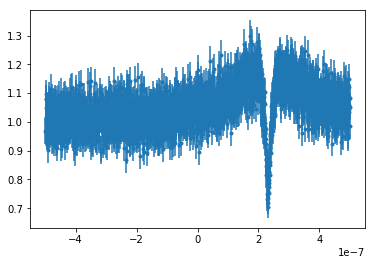

In [25]:
print(header)
plt.errorbar(time, g2, g2_error, fmt='.')

## or you just use the helper class wich also provides simple fitting with lmfit for typical systems and more

In [7]:
%matplotlib inline
import nanooptics.photophysics as pp
import matplotlib.pyplot as plt

ImportError: cannot import name 'cycorr'

In [29]:
tt = pp.TimeTagMeasurement(pt2_filepath='./sample_data.pt2', g2_cutofftime=500e-9, g2_resolution=400e-12)

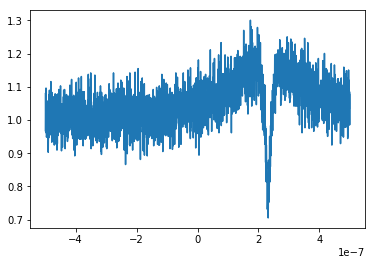

In [30]:
plt.plot(tt.g2_time, tt.g2_normalized)

[[Model]]
    Model(g2_wrapped)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 2500
    # variables        = 5
    chi-square         = 2575.157
    reduced chi-square = 1.032
    Akaike info crit   = 84.050
    Bayesian info crit = 113.170
[[Variables]]
    tau0:          2.3163e-07 +/- 2.04e-10 (0.09%) (init= 2.3e-07)
    bgfactor:      0.85891483 +/- 0.035808 (4.17%) (init= 0.1)
    t_antibunch:   1.3198e-08 +/- 6.20e-10 (4.70%) (init= 1e-08)
    A_0:           0.84646421 +/- 0.050563 (5.97%) (init= 0.2)
    t_0:           1.3476e-07 +/- 4.93e-09 (3.66%) (init= 1e-07)
    g2_0:          0.71061167 +/- 0.011149 (1.57%)  == '( bgfactor**2 + 2*bgfactor ) / ( 1 + bgfactor )**2'
[[Correlations]] (unreported correlations are <  0.100)
    C(t_antibunch, A_0)          =  0.871 
    C(bgfactor, A_0)             =  0.818 
    C(A_0, t_0)                  = -0.674 
    C(bgfactor, t_antibunch)     =  0.659 
    C(t_antibunch, t_0)          = -0.598 
    C(bgfactor, t_

(<matplotlib.figure.Figure at 0x7f33905addd8>,
 <matplotlib.gridspec.GridSpec at 0x7f33900596a0>)

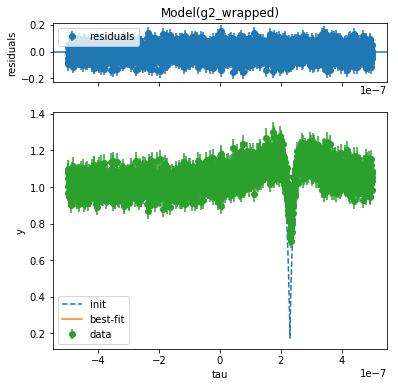

In [34]:
tt.fit(tau0=2.3e-7, t_antibunch=1e-8,  a_bunch=[0.2], t_bunch=[1e-7])
print(tt.fitresult.fit_report())
tt.fitresult.plot()